In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Reading the all data

In [2]:
d1=pd.read_csv('phone_user_review_file_1.csv')
d1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [3]:
d1.shape

(374910, 11)

In [4]:
d2=pd.read_csv('phone_user_review_file_2.csv')
d2.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [5]:
d2.shape

(114925, 11)

In [6]:
d3=pd.read_csv('phone_user_review_file_3.csv')
d3.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versões mel...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenção na entrega. O aparelho é mui...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [7]:
d3.shape

(312961, 11)

In [8]:
d4=pd.read_csv('phone_user_review_file_4.csv')
d4.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [9]:
d4.shape

(98284, 11)

In [10]:
d5=pd.read_csv('phone_user_review_file_5.csv')
d5.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [11]:
d5.shape

(350216, 11)

In [12]:
d6=pd.read_csv('phone_user_review_file_6.csv')
d6.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


In [13]:
d6.shape

(163837, 11)

In [14]:
#combining all data in one dataframe
df=pd.concat([d1,d2,d3,d4,d5,d6],axis=0, ignore_index=True)
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [15]:
df.tail(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
1415123,/cellphones/alcatel-ot-club_1187/,5/25/2000,de,de,Ciao,ciao.de,8.0,10.0,Vor ein paar Monaten bekam ich das Alcatel Clu...,abruna,Alcatel Club Plus Handy
1415124,/cellphones/alcatel-ot-club_1187/,5/21/2000,de,de,Ciao,ciao.de,8.0,10.0,Das Handy kann man einfacher bedienen als eine...,Villeneuve99,Alcatel Club Plus Handy
1415125,/cellphones/alcatel-ot-club_1187/,5/21/2000,de,de,Ciao,ciao.de,8.0,10.0,"Wem Design nicht so wichtig ist, der sollte si...",Larz,Alcatel Club Plus Handy
1415126,/cellphones/alcatel-ot-club_1187/,5/20/2000,de,de,Ciao,ciao.de,4.0,10.0,Wenn ich das Club von Alcatel in der Hand habe...,BBC_NEWS,Alcatel Club Plus Handy
1415127,/cellphones/alcatel-ot-club_1187/,5/19/2000,de,de,Ciao,ciao.de,2.0,10.0,"Als langjähriger Handybesitzer und -nutzer, ne...",anjuli,Alcatel Club Plus Handy
1415128,/cellphones/alcatel-ot-club_1187/,5/12/2000,de,de,Ciao,ciao.de,2.0,10.0,Weil mein Onkel bei ALcatel arbeitet habe ich ...,david.paul,Alcatel Club Plus Handy
1415129,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10.0,10.0,Hy Liebe Leserinnen und Leser!! Ich habe seit ...,Christiane14,Alcatel Club Plus Handy
1415130,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2.0,10.0,"Jetzt hat wohl Alcatell gedacht ,sie machen wa...",michaelawr,Alcatel Club Plus Handy
1415131,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8.0,10.0,Ich bin seit 2 Jahren (stolzer) Besitzer eines...,claudia0815,Alcatel Club Plus Handy
1415132,/cellphones/alcatel-ot-club_1187/,4/25/2000,de,de,Ciao,ciao.de,2.0,10.0,"Was sich Alkatel hier wieder ausgedacht hat,sc...",michaelawr,Alcatel Club Plus Handy


In [16]:
df.shape

(1415133, 11)

In [17]:
#checking duplicate values
df.duplicated().sum()

6412

In [18]:
#Removing it
df=df.drop_duplicates()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408721 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1408721 non-null  object 
 1   date       1408721 non-null  object 
 2   lang       1408721 non-null  object 
 3   country    1408721 non-null  object 
 4   source     1408721 non-null  object 
 5   domain     1408721 non-null  object 
 6   score      1345628 non-null  float64
 7   score_max  1345628 non-null  float64
 8   extract    1389707 non-null  object 
 9   author     1346904 non-null  object 
 10  product    1408720 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.0+ MB


In [20]:
#checking null values and droping it
df.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63093
score_max    63093
extract      19014
author       61817
product          1
dtype: int64

In [21]:
df=df.dropna()

In [22]:
df.shape

(1271451, 11)

In [23]:
df.isna().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [24]:
df.describe()

,score,score_max
count,1.271451e+06,1271451.0
mean,8.006910e+00,10.0
std,2.621829e+00,0.0
min,2.000000e-01,10.0
25%,7.300000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


In [25]:
df.lang.value_counts()

en    542552
de    167649
ru    138008
it    112142
es     97927
fr     83058
pt     56680
nl     36683
sv     17092
fi      6769
tr      6467
no      1899
cs      1683
he      1361
pl       466
da       407
hu       330
id       263
ar        12
zh         3
Name: lang, dtype: int64

<AxesSubplot:xlabel='lang', ylabel='count'>

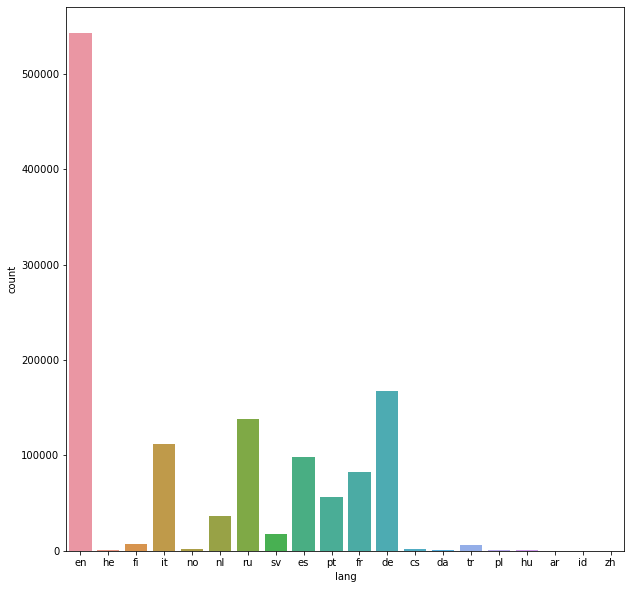

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(df.lang)

In [27]:
df['phone_url'].value_counts(ascending=False).head(10)

/cellphones/samsung-galaxy-s6/            15842
/cellphones/samsung-galaxy-s7-edge/       15536
/cellphones/apple-iphone-5s/              15490
/cellphones/samsung-galaxy-s5/            15231
/cellphones/motorola-moto-g/              14394
/cellphones/samsung-galaxy-s-iii/         13787
/cellphones/samsung-galaxy-s7-789999/     13237
/cellphones/huawei-p8-lite/               12520
/cellphones/samsung-i9500-galaxy-s-iv/    12295
/cellphones/lenovo-vibe-k4-note/           9653
Name: phone_url, dtype: int64

In [28]:
df.country.value_counts().head(10)

us    310182
de    167575
in    127678
ru    114875
it    112142
gb     92677
fr     83058
es     74697
br     53527
nl     24150
Name: country, dtype: int64

<AxesSubplot:xlabel='country', ylabel='count'>

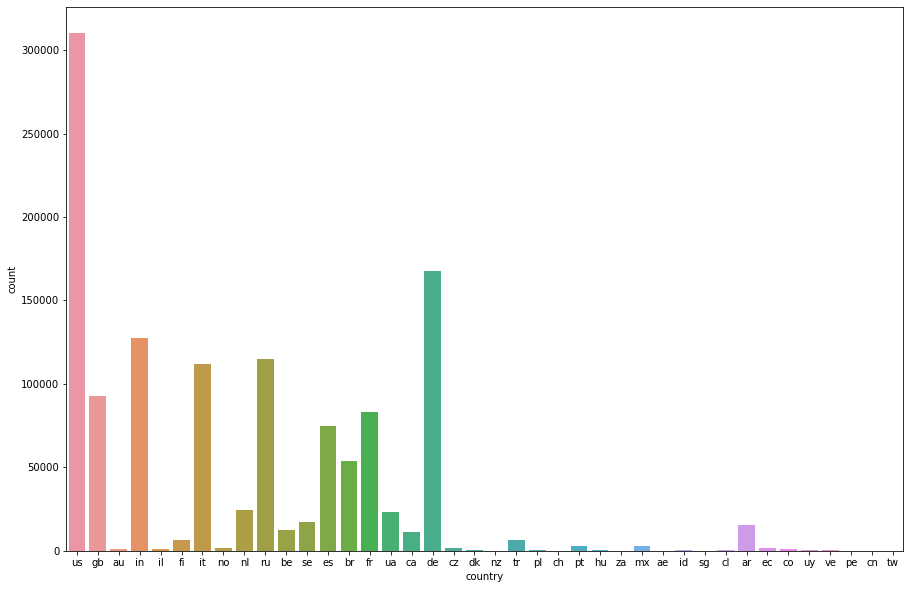

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(df.country)

<Figure size 720x720 with 0 Axes>

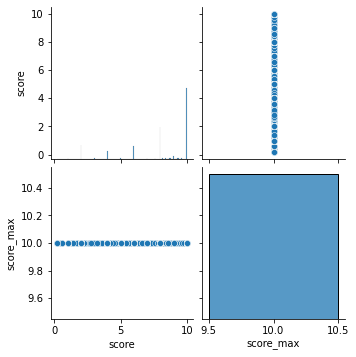

In [30]:
plt.figure(figsize=(10,10))
sns.pairplot(df)

In [31]:
#taking Sample of only 1M data points from the whole dataset
df = df.sample(n=1000000,random_state=612)

In [32]:
df

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
609806,/cellphones/nokia-lumia-1020/,11/20/2013,en,gb,Amazon,amazon.co.uk,10.0,10.0,"How did I live without it, excellent in every ...",jimperkins110,Lumia Nokia Lumia 1020 UK Sim Free Windows Sma...
1372024,/cellphones/motorola-v557/,1/19/2006,en,us,Amazon,amazon.com,2.0,10.0,I've had this phone for a little more than a y...,Penelope Brown,Motorola V557 Unlocked Quadband Cell Phone
1110810,/cellphones/sanyo-scp-3810/,12/14/2009,en,us,Phone Scoop,phonescoop.com,4.0,10.0,I won't give it a rating so far. I just acquir...,JohnnyPasta,SCP-3810 / Mirro
532252,/cellphones/apple-iphone-5s/,8/26/2014,en,us,Amazon,amazon.com,10.0,10.0,"my in-laws really love the gifts iph5s, thank you",Mitchell Coleman,Apple iPhone 5s 16GB 4G LTE GSM Gold - AT&T Wi...
1334423,/cellphones/motorola-l6/,1/28/2009,es,ec,MercadoLibre,opinion.mercadolibre.com.ec,6.0,10.0,ESTA BUENO BONITO Y BARATO,JESSROSA,Motorola L6
...,...,...,...,...,...,...,...,...,...,...,...
419842,/cellphones/bq-aquaris-e4-5/,1/24/2015,es,es,Amazon,amazon.es,10.0,10.0,Buen procesador. Va rápido y tiene una batería...,Etelop,BQ Aquaris E4.5 - Smartphone libre Android (pa...
915112,/cellphones/lg-p690/,5/2/2012,ru,ua,Price.ua,price.ua,10.0,10.0,"Смарт очень продуманный, понимаешь это сразу п...",ipopov-sky,LG P690 Optimus Link
1263546,/cellphones/sony-ericsson-w300i/,11/12/2009,es,ar,MercadoLibre,opinion.mercadolibre.com.ar,10.0,10.0,no tengo mucho decir les quiero decir que teng...,DINAMICA99,Sony Ericsson W300
301402,/cellphones/bq-aquaris-e5/,12/5/2014,es,es,Amazon,amazon.es,2.0,10.0,Estoy muy. Contento y satisfecho con este móvi...,Cliente Amazon,BQ Aquaris E5 HD - Smartphone libre Android (p...


In [33]:
#data whoose score is equal to 10
df[df.score==10]

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
609806,/cellphones/nokia-lumia-1020/,11/20/2013,en,gb,Amazon,amazon.co.uk,10.0,10.0,"How did I live without it, excellent in every ...",jimperkins110,Lumia Nokia Lumia 1020 UK Sim Free Windows Sma...
532252,/cellphones/apple-iphone-5s/,8/26/2014,en,us,Amazon,amazon.com,10.0,10.0,"my in-laws really love the gifts iph5s, thank you",Mitchell Coleman,Apple iPhone 5s 16GB 4G LTE GSM Gold - AT&T Wi...
230610,/cellphones/microsoft-lumia-950-xl/,9/26/2016,it,it,Amazon,amazon.it,10.0,10.0,Peccato che sarà l'ultimo smartphone marchiato...,Lorise,"Microsoft Lumia 950 XL Smartphone, 5.7"", camer..."
939258,/cellphones/htc-flyer/,4/16/2012,de,de,Amazon,amazon.de,10.0,10.0,Das beste Tablet für den Preis was ich gefunde...,Nico,HTC Flyer Tablet 16GB (17.8cm (7 Zoll) Touchcr...
61369,/cellphones/huawei-p9-plus/,7/27/2016,it,it,Amazon,amazon.it,10.0,10.0,basta guardare le recensioni per capire che è ...,Alessiog,"Huawei P9 Plus Smartphone, LTE, Display 5.5'' ..."
...,...,...,...,...,...,...,...,...,...,...,...
149289,/cellphones/huawei-honor-6x/,2/23/2017,en,in,Amazon,amazon.in,10.0,10.0,Very very good mobile both sim slot are 2g3g4g,Amazon Customer,"Honor 6X (Grey, 32GB)"
419842,/cellphones/bq-aquaris-e4-5/,1/24/2015,es,es,Amazon,amazon.es,10.0,10.0,Buen procesador. Va rápido y tiene una batería...,Etelop,BQ Aquaris E4.5 - Smartphone libre Android (pa...
915112,/cellphones/lg-p690/,5/2/2012,ru,ua,Price.ua,price.ua,10.0,10.0,"Смарт очень продуманный, понимаешь это сразу п...",ipopov-sky,LG P690 Optimus Link
1263546,/cellphones/sony-ericsson-w300i/,11/12/2009,es,ar,MercadoLibre,opinion.mercadolibre.com.ar,10.0,10.0,no tengo mucho decir les quiero decir que teng...,DINAMICA99,Sony Ericsson W300


In [34]:
#checking the score value and visualizing it
df.score.value_counts()

10.0    486058
8.0     217951
2.0      96586
6.0      85227
4.0      52828
         ...  
7.9          2
4.9          1
6.1          1
0.4          1
8.9          1
Name: score, Length: 85, dtype: int64

In [35]:
df.source.value_counts().head()

Amazon          570859
Yandex           60123
Ciao             46654
Samsung          35748
MercadoLibre     26207
Name: source, dtype: int64

<AxesSubplot:xlabel='score', ylabel='count'>

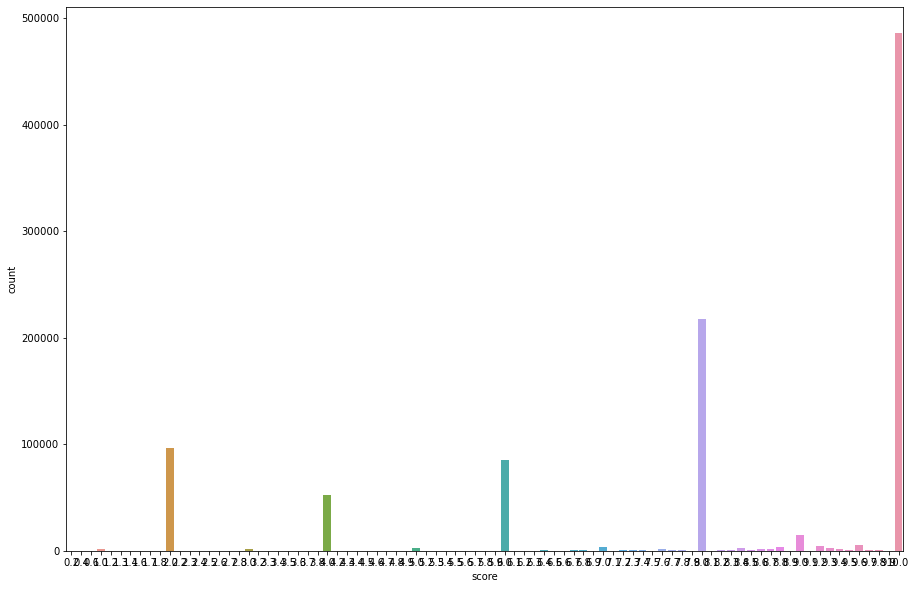

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(df.score)

In [37]:
## Users with highest number of reviews
df.author.value_counts()

Amazon Customer      60330
Cliente Amazon       15042
e-bit                 6620
Client d'Amazon       6042
Amazon Kunde          3718
                     ...  
Mjasnikov evgeniy        1
philou90                 1
TechRax                  1
brandy wilson            1
Jman0917                 1
Name: author, Length: 626247, dtype: int64

In [38]:
#Most rated products
df['product'].value_counts().head()

Lenovo Vibe K4 Note (White,16GB)     4118
Lenovo Vibe K4 Note (Black, 16GB)    3443
OnePlus 3 (Graphite, 64 GB)          3212
OnePlus 3 (Soft Gold, 64 GB)         2798
Huawei P8lite zwart / 16 GB          2121
Name: product, dtype: int64

In [39]:
df[df['score']==10]['author'].value_counts().head(10)


Amazon Customer    25303
Cliente Amazon      7871
e-bit               3991
Client d'Amazon     2473
Amazon Kunde        1821
einer Kundin        1671
einem Kunden        1193
unknown              880
Anonymous            752
Anonymous            564
Name: author, dtype: int64

In [40]:
df['product'].value_counts().head(20)

Lenovo Vibe K4 Note (White,16GB)                                                                                                                                                             4118
Lenovo Vibe K4 Note (Black, 16GB)                                                                                                                                                            3443
OnePlus 3 (Graphite, 64 GB)                                                                                                                                                                  3212
OnePlus 3 (Soft Gold, 64 GB)                                                                                                                                                                 2798
Huawei P8lite zwart / 16 GB                                                                                                                                                                  2121
Lenovo Vibe K5 (Gold, VoLTE up

In [41]:
# as per guidelines irrelevant and relevant features are below.so droping the irrelevant features from the dataset
#relevant_features=['author','product','score']
# irrelvant_features=['phone_url','date','lang','country','source','domain','score_max','extract']
df=df.drop(['phone_url','date','lang','country','source','domain','score_max','extract'],axis=1)

# Selecting data with products having >50 ratings and users who have given > 50 ratings

In [42]:
author50 = df['author'].value_counts()
author50=author50[author50>50].index.tolist()


In [43]:
## list of authors with > 50 ratings
len(author50)

627

In [44]:
product50 = df['product'].value_counts()
product50=product50[product50>50].index.tolist()
## list of products with > 50 ratings
len(product50)

4497

In [45]:
df50 = df[(df['author'].isin(author50)) & (df['product'].isin(product50))]
df50.shape

(111697, 3)

# Building a popularity based model 

In [46]:
#calculating the mean score for a product by grouping it.
ratings_mean = pd.DataFrame(df.groupby('product')['score'].mean()) 

In [47]:
# calculating the number of ratings a product got
ratings_mean['rating_counts'] = pd.DataFrame(df.groupby('product')['score'].count())  

In [48]:
# 3. Recommending the 5 mobile phones based in highest mean score and highest number of ratings the product got. 
ratings_mean.sort_values(by=['score','rating_counts'], ascending=[False,False]).head()

,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,156
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 Câmera 10MP e Frontal 2MP Memória Interna de 16GB GSM,10.0,144
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi Câmera 5MP,10.0,140
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 Câmera 5MP 3G Wi-Fi Memória Interna 8G GPS,10.0,136
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi Câmera 5MP - Preto,10.0,129


# Now Building a collaborative filtering model

In [49]:
# arranging columns 
columns_titles = ['author','product','score']
dff = df.reindex(columns=columns_titles)

In [50]:
# as guidelines,Keeping only 5000 data samples
df_data = dff.sample(n=5000, random_state=612)

In [51]:
# Building a collaborative filtering model using SVD. 
reader_data = Reader(rating_scale=(1, 10))
data_set = Dataset.load_from_df(df_data,reader = reader_data)

In [52]:
trainset = data_set.build_full_trainset()

In [53]:
model = SVD()
model.fit(trainset)

In [54]:
# Now predicting ratings for all pairs of data that are NOT in the training set.
testset = trainset.build_anti_testset()

In [55]:
predictions = model.test(testset)

In [56]:
#RMSE value for SVD
accuracy.rmse(predictions, verbose=True)

RMSE: 0.3380


0.3379978913471923

In [57]:
cross_validate(model, data_set, measures=['RMSE'], cv=3, verbose=False)

{'test_rmse': array([2.62253657, 2.55935029, 2.50525809]),
 'fit_time': (0.19718503952026367, 0.30907773971557617, 0.17283058166503906),
 'test_time': (0.037774085998535156,
  0.015621185302734375,
  0.01562190055847168)}

# from above calculations, here we can see that RMSE of SVD model is lower than the cross validation

# Now as per guideline, Building a collaborative filtering model using kNNWithMeans from surprise using Item based model

In [58]:
# Read dataset.
reader = Reader(rating_scale=(1, 10))
data_df = Dataset.load_from_df(df_data,reader = reader)

In [59]:
trainsetdf, testsetdf = train_test_split(data_df, test_size=.15)

In [60]:
# Using user_based true/false to switch between user-based or item-based collaborative filtering
model = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
model.fit(trainsetdf)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [61]:
# run the  model against the testset
test_pred_df = model.test(testsetdf)

In [62]:
## get RMSE
accuracy.rmse(test_pred_df, verbose=True)

RMSE: 2.6279


2.627899529673257

# Now again,Build a collaborative filtering model using kNNWithMeans from surprise using User based model

In [63]:
reader = Reader(rating_scale=(1, 10))
datadp = Dataset.load_from_df(df_data,reader = reader)


In [64]:
trainsetdp, testsetdp = train_test_split(datadp, test_size=.15)

In [65]:
# Using user_based true/false to switch between user-based or item-based collaborative filtering
model = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
model.fit(trainsetdp)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [66]:
# run the trained model against the testset
test_pred_dp = model.test(testsetdp)

In [67]:
# 5. Evaluating the collaborative model and Printing RMSE value for User Based CF
accuracy.rmse(test_pred_dp, verbose=True)

RMSE: 2.6587


2.658675391884893

# Que10. In what business scenario you should use popularity based Recommendation Systems

In [68]:
#Ans.=Popularity based recommendation system works by recommending items viewed/purchased by most people and rated high 
#Recommendations: Ranked list of items by their purchase viewed count Popular News. It uses
#context,Purchase history,User and item features. We can use it in movie recommendation, song recommendation, books recommendation etc

# Que 11. In what business scenario you should use CF based Recommendation Systems 

In [69]:
#Ans=Collaborative Filtering is used to building intelligent recommender systems that can learn to give better recommendations as 
#more information about users is collected. It is a personalised recommender system , recommendations are made based on the past
#behaviour of the user. Most websites like Amazon, YouTube, and Netflix use collaborative filtering as a part of their 
#sophisticated recommendation system.because users want to see the content according to their likes and dislikes

# Que 12. What other possible methods can you think of which can further improve the recommendation for different users

In [70]:
#Ans=For improvement,apart from Popularity and Collaborative Filtering , Content-based, Demographic, Utility based, Knowledge based and
#Hybrid recommendation system can be used as per the user needs.